<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Разработка модели


Ориентировочное время необходимо: ** 30 ** минут
    

## Цели

После завершения этой лаборатории вы сможете:

* Разработка моделей прогнозирования


<p> В этом разделе мы разработаем несколько моделей, которые будут предсказать цену автомобиля, используя переменные или функции.Это всего лишь оценка, но должна дать нам объективное представление о том, сколько стоит автомобиль. </P>


Некоторые вопросы, которые мы хотим задать в этом модуле
<ul>
    <li> Знаю ли я, предлагает ли дилер справедливую стоимость для моего обмена? </li>
    <li> Знаю ли я, если я выражу справедливую ценность на свою машину? </li>
</ul>
<p> В аналитике данных мы часто используем разработку модели <b>, чтобы помочь нам предсказать будущие наблюдения из данных, которые у нас есть. </p>.

<p> Модель поможет нам понять точную связь между различными переменными и тем, как эти переменные используются для прогнозирования результата. </p>


<h4>Setup</h4>


Импорт библиотеки:


In [5]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
# mamba install sklearn=0.20.1-y
# импортирую обновленный сиборн 
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Загрузите данные и сохраните их в DataFrame `df`:


Этот набор данных был размещен на облачном объекте IBM.Нажмите <a href="https://cocl.us/da101en_object_storage"> здесь </a> для бесплатного хранения.


In [7]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# описание столбцов в сете данных:
 
марка автомобиля **(Make)**

аспирация **(aspiration)**

количество дверей **(num-of-doors)**

стиль кузова **(body-style)**

ведущие колеса	**(drive-wheels)**

расположение двигателя (**engine-location)**

колёсная база 	**(wheel-base)**

длина автомобиля **(length)**

степень сжатия	двигателя **(compression-ratio)**

лошадиная сила автомобиля	**(horsepower)**

пиковые обороты	**(peak-rpm)**

расход галлонов топлива на милю по городу	**(city-mpg)**

расход галлонов топлива на милю по шоссе	**(highway-mpg)**

цена автомобиля	**(price)**

мощность в лошадиных силах	**(horsepower-binned)** что то типа рейтинга, в градация мало, много, средне, относительно количественного показателя выборки в столбце лошадиные силы

дизель	**(diesel)** - дизельный автомобиль

газ **(gas)** - автомобиль на газу 

<h2> 1.Линейная регрессия и множественная линейная регрессия </h2>


<h4> Линейная регрессия </h4>


<p> Один пример модели данных, которую мы будем использовать: </p>
<b> простая линейная регрессия </b>

<br>
<p> Простая линейная регрессия - это метод, который поможет нам понять взаимосвязь между двумя переменными: </p>
<ul>
    <li> Предиктор/независимая переменная (x) </li>
    <li> Ответ/зависимая переменная (которую мы хотим предсказать) (y) </li>
</ul>

<p> Результатом линейной регрессии является линейная функция <b> </b>, которая предсказывает переменную ответа (зависимая) как функция переменной предиктора (независимой). </p>



$$
 Y: Response \ Variable\\\\
 X: Predictor \ Variables
$$


 <b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li> <b> А </b> относится к <b> intercept </b> линии регрессии, другими словами: <b>значение y, когда x - 0</b>  </li>
    <li> <b> В </b> относится к <b> наклону (SLOPE) линии регрессии</b>, другими словами: значение, с которым <b> y </b> меняется, когда <b> x </b> увеличивается на 1 единицу </li>
</ul>

<h4> Давайте загрузим модули для линейной регрессии: </h4>

если библиотека не загружена то:  pip install scikit-learn


In [10]:
from sklearn.linear_model import LinearRegression

<h4> создать объект линейной регрессии: </h4>

In [11]:
lm = LinearRegression()
lm

LinearRegression()

<h4> Как «Шоссе-MPG» может помочь нам предсказать цену автомобиля? </h4>


Для этого примера мы хотим взглянуть на то, как Highway-MPG может помочь нам предсказать цену автомобиля.
Используя простую линейную регрессию, мы создадим линейную функцию с «шоссе-MPG» в качестве переменной предиктора и «цена» в качестве переменной отклика.


In [12]:
X = df[['highway-mpg']]
Y = df[['price']]

Установите линейную модель, используя шоссе-MPG:


In [13]:
lm.fit(X,Y)

LinearRegression()

Мы можем вывести прогноз  ВВЕДЕКМ ПАРАМЕТР ограничения  вывода  первыми пятью занчениями. **(X[0:5]отобразит первые 5 значений X . Y[0:5]отобразит первые 5 значений Y)**

ТО ЕСТЬ, наш прогноз выдаст первые 5 спрогнозированных значений цены:

In [14]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

<h4> Каково значение у в тот момент когда х равен нулю относительно нашей модели? ( intercept - перехват, прямой отрезок) (a)? </h4>


In [15]:
lm.intercept_

array([38423.30585816])

<h4> Каково значение наклона (slope) (b)? </h4>


In [16]:
lm.coef_

array([[-821.73337832]])

<h3> Какую окончательную линейную модель мы получаем? </h3>

воспользуемся формулой 


Как мы видели выше, мы должны получить последнюю линейную модель со структурой:


$$
Yhat = a + b  X
$$


Подключение фактических значений, которые мы получаем:


<b> Цена </b> = 38423,31 - 821,73 x <b> галлон на милю по шоссе </b>


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 1 а): </h1>

<b> создать объект линейной регрессии под названием «LM1». </b>
</div>


In [17]:
# Write your code below and press Shift+Enter to execute 
LM1  = LinearRegression()
LM1

LinearRegression()

<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 1 b): </h1>

<b> тренировать модель, используя «размер двигателя» в качестве независимой переменной и «цена» в качестве зависимой переменной? </b>
</div>

In [18]:
# engine-size будет предиктором, предстказываемым значением как всегда будет цена
x = df[['engine-size']]
y = df ['price']
# тренируем линейную модель 
LM1.fit(x,y)
LM1


LinearRegression()

<details><summary>Второй вариант, без переменных - напрямую вписывать имя столбца</summary>

```python
lm1.fit(df[['engine-size']], df[['price']])
lm1
```

</details>



<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 1 c): </h1>

<b> Найдите наклон и перехват модели. </b>
</div>


<h4>Slope</h4>

ОБЬЕКТ ЛИНЕЙНОЙ РЕГРЕССИИ НАЗЫВАЕТСЯ LM1  И ПЕРЕМЕННАЯ КОТОРАЯ ПРИСВОЕНА ЦЕНЕ ЭТО маленькая **х**

опять же ограничимся 5 значениями Yhat[0:5]

In [19]:
Yhat=LM1.predict(x)
Yhat[0:5]
LM1.coef_   

array([166.86001569])

<h4>Intercept </h4> для обьекта линейной регрессии LM1


In [20]:
# Write your code below and press Shift+Enter to execute 
LM1.intercept_

-7963.338906281024

<details><summary>Click here for the solution</summary>

```python
# Slope 
lm1.coef_

# Intercept
lm1.intercept_
```

</details>



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Вопрос № 1 D): </h1>

<b> Каково уравнение предсказанной линии?Вы можете использовать x и yhat или «размер двигателя» или «цена». </B>
</div>

In [ ]:
# Write your code below and press Shift+Enter to execute 
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86* engine-size

<details><summary>цена может быть предстказана вот так</summary>

```python
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*engine-size

```

</details>



# Множественная линейная регрессия


<p> Что если мы хотим предсказать цену автомобиля, используя более одной переменной? </p>

<p> Если мы хотим использовать больше переменных в нашей модели для прогнозирования цены на автомобиль, мы можем использовать <b> несколько линейных регрессий </b>.
Множественная линейная регрессия очень похожа на простую линейную регрессию, но этот метод используется для объяснения взаимосвязи между 

одной переменной непрерывной реакции (зависимой) и <b> двумя или более </b> предикторами (независимыми) переменными.
Большинство реальных регрессионных моделей включают несколько предикторов.

Мы проиллюстрируем структуру, используя четыре переменные предиктора, но эти результаты могут обобщить на любое целое число: </p>

$$
Y: Response \ Variable\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$


Уравнение дано:


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p> Из предыдущего раздела мы знаем, что другие хорошие предикторы цен могут быть: </p>
<ul>
    <li> Мощность </li>
    <li> Корбал-вес </li>
    <li> Размер двигателя </li>
    <li> Шоссе-mpg </li>
</ul>
Давайте разработаем модель, используя эти переменные в качестве переменных предиктора
положим все нужные переменные в одну переменную Z

In [21]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Установите линейную модель, используя четыре вышеупомянутые переменные.


In [22]:
lm.fit(Z, df['price'])

LinearRegression()

Каково значение перехвата (а)?


In [23]:
lm.intercept_

-15806.62462632923

Каковы значения коэффициентов (B1, B2, B3, B4)?


In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

 Какова конечная предполагаемая линейная модель, которую мы получаем?


Как мы видели выше, мы должны получить последнюю линейную функцию со структурой:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Какая линейная функция мы получаем в этом примере?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 2 а): </h1>
Создайте и тренируйте модель множественной линейной регрессии «LM2», где переменная отклика «цена», а переменная предиктора-«нормализованные потери» и «шоссе-MPG».
</div>

In [25]:
# Write your code below and press Shift+Enter to execute 
lm2 = LinearRegression()
lm2

LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


```

</details>



<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 2 B): </h1>
<b> Найдите коэффициент модели. </b>
</div>


In [26]:
# Write your code below and press Shift+Enter to execute 

Mult_reg_x = df[["normalized-losses","highway-mpg"]]
lm2.fit(Mult_reg_x,df['price'])
lm2.coef_

array([   1.49789586, -820.45434016])

<details><summary>Click here for the solution</summary>

```python
lm2.coef_

```

</details>



<h2> 2.Оценка модели с использованием визуализации </h2>


Теперь, когда мы разработали несколько моделей, как мы оцениваем наши модели и выбираем лучшие?Один из способов сделать это - использовать визуализацию.


Импортируйте пакет визуализации, Seaborn:


In [27]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>


<p> Когда дело доходит до простой линейной регрессии, отличный способ визуализации соответствия нашей модели - использование графиков регрессии <b> </b>. </p>

<p> На этом графике будет показана комбинация разбросанных точек данных (A <b> Scatterplot </b>), а также установленную линейную регрессию </b>, проходящую через данные.Это даст нам разумную оценку взаимосвязи между двумя переменными, силой корреляции, а также направления (положительная или отрицательная корреляция). </P>

Давайте визуализируем ** шоссе-MPG ** как потенциальная переменная предиктора цены:


(0.0, 48165.19730599285)

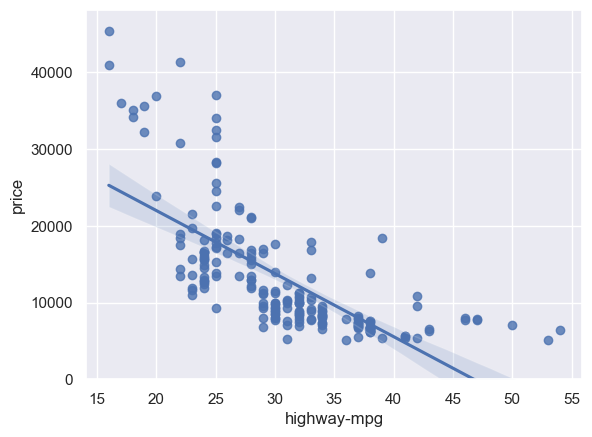

In [30]:

sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)


<p> Из этого графика мы видим, что цена отрицательно коррелирует с шоссе-MPG, поскольку наклон регрессии отрицателен.

При рассмотрении сюжета регрессии есть одна вещь, чтобы обратить внимание на то, насколько разбросаны точки данных вокруг линии регрессии.Это даст вам хорошее представление о дисперсии данных и будет ли линейная модель лучше всего подходит или нет.

Если данные слишком далеко от линии, эта линейная модель может быть не лучшей моделью для этих данных.

Давайте сравним этот график с графиком регрессии «Пик-RPM». </P>


(0.0, 47414.1)

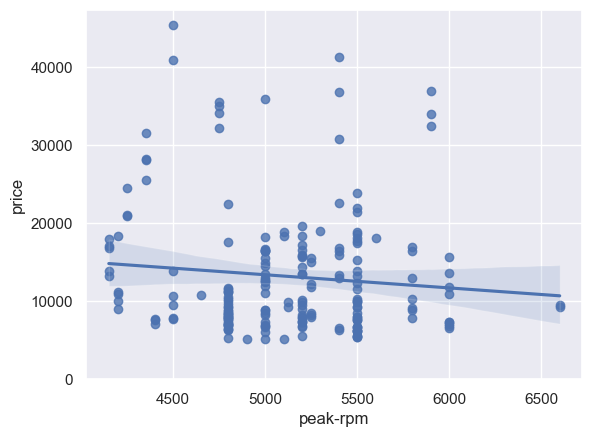

In [31]:

sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p> Сравнивая график регрессии «peak-RPM» и «highway-MPG», мы видим, что точки для «highway-MPG» намного ближе к генерируемой линии и, в среднем, уменьшаются. Точки для «peak RPM» имеют больше распространения вокруг прогнозируемой линии, и гораздо сложнее определить, уменьшаются ли точки или увеличиваются по мере увеличения «peak RPM». </P>


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 3: </h1>
<b>, учитывая графики регрессии выше, является ли «пик-RPM» или «шоссе-MPG» более сильно коррелирует с «ценой»?Используйте метод ".corr ()", чтобы проверить свой ответ. </B>
</div>


In [33]:
# Write your code below and press Shift+Enter to execute 
df[['peak-rpm', 'highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<details><summary>Click here for the solution</summary>

```python
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

```

</details>



<h3> остаточный график </h3>

<p> Хороший способ визуализации дисперсии данных - использовать остаточный график. </p>

<p> Что такое <b> остаточный </b>? </p>

<p> Разница между наблюдаемым значением (Y) и прогнозируемым значением (Yhat) называется остаточным (E).Когда мы смотрим на график регрессии, остаток - это расстояние от точки данных до установленной линии регрессии. </P>

<p> Итак, что такое остаточный график <b> </b>? </p>

<p> остаточный график-это график, который показывает остатки на вертикальной оси Y и независимая переменная на горизонтальной оси x. </p>

<p> На что мы обращаем внимание на остаточный сюжет? </p>

<p> мы смотрим на распространение остатков: </p>

<p>- Если точки в остаточном графике <b> случайным образом распределены вокруг оси x, то для данных подходит линейная модель <b> </b>.

Почему это?Случайно распределение остатков означает, что дисперсия постоянна, и, следовательно, линейная модель подходит для этих данных. </P>

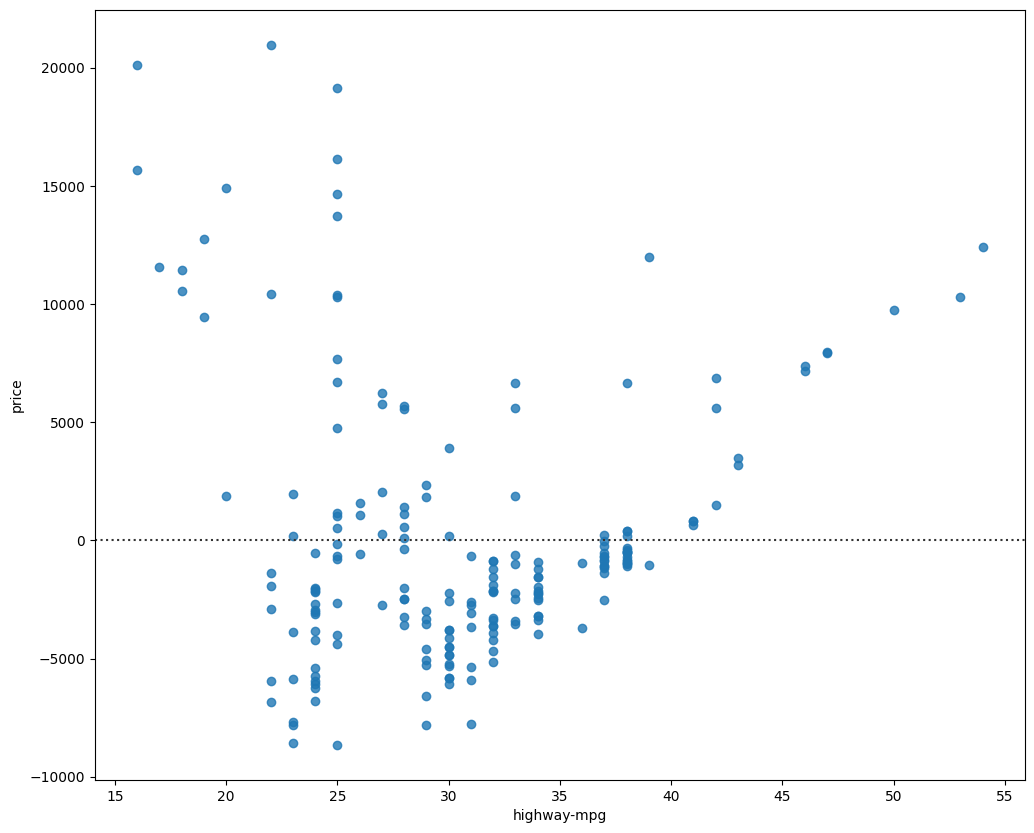

In [79]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<i> Что этот сюжет говорит нам? </i>

<p> Из этого остаточного графика мы видим, что остатки не распространяются по оси x, что заставляет нас полагать, что, возможно, нелинейная модель более подходит для этих данных. </p>.


<h3>Multiple Linear Regression</h3>


<p> Как нам визуализировать модель для множественной линейной регрессии?Это становится немного сложнее, потому что вы не можете визуализировать его с регрессией или остаточным сюжетом. </P>

<p> Один из способов взглянуть на соответствие модели - посмотреть на график распределения <b> </b>.Мы можем посмотреть на распределение подходящих значений, которые возникают из модели, и сравнить его с распределением фактических значений. </P>


Во -первых, давайте сделаем прогноз:


In [38]:
Y_hat = lm.predict(Z)

C:\Users\admin\AppData\Local\Temp/ipykernel_7272/2674931251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\admin\AppData\Local\Temp/ipykernel_7272/2674931251.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax 

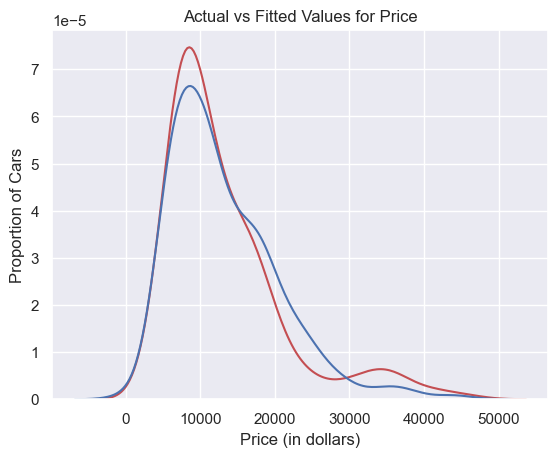

In [39]:

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
ax = sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p> Мы видим, что подходящие значения достаточно близки к фактическим значениям, поскольку два распределения немного перекрываются.Тем не менее, определенно есть место для улучшения. </P>


<h2> 3.Полиномиальная регрессия и конвейер </h2>


<p> <b> Полиномиальная регрессия </b> - это конкретный случай общей модели линейной регрессии или нескольких моделей линейной регрессии. </p>
<p> Мы получаем нелинейные отношения, квадратируя или установив условия более высокого порядка переменных предиктора. </p>

<p> Существуют разные порядки полиномиальной регрессии: </p>


<Chenter> <b> квадратичный - 2 -й порядок </b> </chenter>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<Chenter> <b> кубический - 3 -й порядок </b> </chenter>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3
$$


<Chenter> <b> высший порядок </b>: </chenter>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 
$$


<p> Ранее мы видели, что линейная модель не обеспечила наилучшего соответствия при использовании «Шоу-MPG» в качестве переменной предиктора.Посмотрим, сможем ли мы попробовать подготовить полиномиальную модель для данных вместо этого. </P>


<p> Мы будем использовать следующую функцию для построения данных: </p>


In [40]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Давайте получим переменные:


In [41]:
x = df['highway-mpg']
y = df['price']

Давайте подгоняем многочлен, используя функцию <b> polyfit </b>, затем используйте функцию <b> poly1d </b> для отображения полиномиальной функции.


In [43]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Давайте построим функцию:


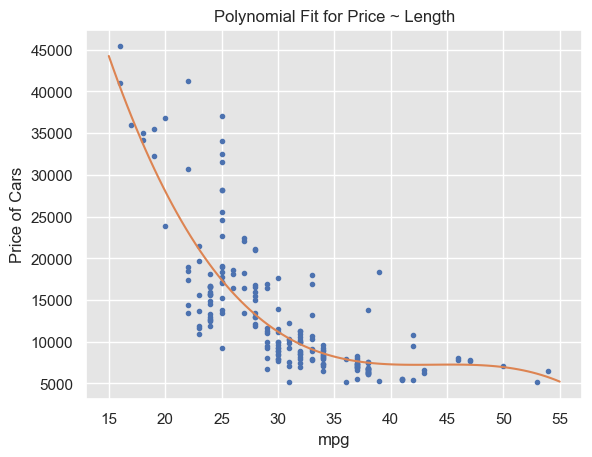

In [47]:
PlotPolly(p, x, y,'highway-mpg')

In [48]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p> Мы уже можем видеть на графике, что эта полиномиальная модель работает лучше, чем линейная модель.Это связано с тем, что   в сгенерированную полиномиальную функцию "попадает" больше точек данных. </P>


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 4: </h1>
<b> Создать 11 -х порядок полиномиальной модели с переменными x и y свыше. </b>
</div>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


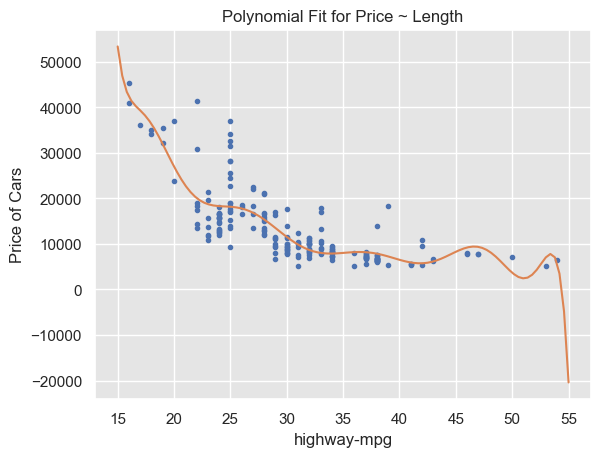

In [56]:
# Write your code below and press Shift+Enter to execute 
f1  = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x,y,'highway-mpg')


<details><summary>Click here for the solution</summary>

```python
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

```

</details>



<p> Аналитическая экспрессия для многомерной полиномиальной функции усложняется.Например, выражение для полинома второго порядка (степень = 2) с двумя переменными определяется как: </p>


$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


Мы можем выполнить полиномиальное преобразование в нескольких функциях.Сначала мы импортируем модуль:


In [57]:
from sklearn.preprocessing import PolynomialFeatures

Мы создаем <b> полиномиал свойства </b> объект степени 2:


In [58]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [67]:
Z_pr=pr.fit_transform(Z)

В исходных данных есть 201 образцы и 4 функции.


In [68]:
Z.shape

(201, 4)

После преобразования есть 201 образцы и 15 функций.


In [69]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


<p> Трубопроводы данных упрощают шаги обработки данных.Мы используем модуль <b> Pipeline </b> для создания конвейера.Мы также используем <b> standardscaler </b> в качестве шага в нашем конвейере (pipeline). </P>


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Мы создаем конвейер, создав список кортежей, включая название модели или оценки и его соответствующий конструктор.


In [63]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Мы вводим список в качестве аргумента в конструктор конвейера:


In [64]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Во -первых, мы преобразуем тип данных типа Z в тип Float, чтобы избежать предупреждений о преобразовании, которые могут появиться в результате того, что стандарты принимают входные данные.

Затем мы можем нормализовать данные, выполнить преобразование и подгонять модель одновременно.


In [71]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Точно так же мы можем нормализовать данные, выполнить преобразование и одновременно произвести прогноз.


In [72]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос № 5: </h1>
<b> Создайте конвейер, который стандартизирует данные, а затем создает прогноз, используя модель линейной регрессии, используя функции Z и Target y. </b>
</div>

In [79]:
# Write your code below and press Shift+Enter to execute 
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe1=Pipeline(Input)

pipe1.fit(Z,y)

ypipe=pipe1.predict(Z)
ypipe[0:10]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<details><summary>Click here for the solution</summary>

```python
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

```

</details>



<h2> 4.Меры для оценки в выборке </h2>


<p> При оценке наших моделей мы не только хотим визуализировать результаты, но и мы также хотим, чтобы количественная мера определила, насколько точна модель. </p>.

<p> Две очень важные меры, которые часто используются в статистике для определения точности модели: </p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, Также известен как коэффициент определения, является мерой, чтобы указать, насколько близки данные к установленной линии регрессии.</p>
    
<p>Значение R-квадрата-это процент изменения переменной отклика (Y), которая объясняется линейной моделью./p>



<b>Mean Squared Error (MSE)</b>

<p>Средняя квадратная ошибка измеряет среднее значение квадратов ошибок.То есть разница между фактическим значением (y) и оцененным значением (ŷ). </P>


<h3> Модель 1: Простая линейная регрессия </h3>


Давайте рассчитаем R^2:


In [82]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Можно сказать, что ~ 49,659% от изменения цены объясняется этой простой линейной моделью "Horsepower_fit".


Давайте рассчитаем MSE:


Мы можем предсказать выход, то есть «yhat», используя метод прогноза, где x - входная переменная:


In [83]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


Давайте импортируем функцию <b> mean_squared_error </b> из модуля <b> metrics </b>:


In [84]:
from sklearn.metrics import mean_squared_error

Мы можем сравнить прогнозируемые результаты с фактическими результатами:


In [85]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3> Модель 2: множественная линейная регрессия </h3>


Давайте рассчитаем R^2:


In [86]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Можно сказать, что ~ 80,896 % от изменения цены объясняется этой множественной линейной регрессией "multi_fit".


Давайте рассчитаем MSE.


Мы производим прогноз:


In [87]:
Y_predict_multifit = lm.predict(Z)

Мы сравниваем прогнозируемые результаты с фактическими результатами:


In [88]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Модель 3: Полетка полинома</h3>


Давайте рассчитаем R^2.


Давайте импортируем функцию <b> r2_score </b> из модуля <b> метрик </b>, поскольку мы используем другую функцию.


In [89]:
from sklearn.metrics import r2_score

Применяем функцию, чтобы получить значение R^2:


In [90]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


Можно сказать, что ~ 67,419 % от изменения цены объясняется этим полиномиальным соответствием.


<h3>MSE</h3>


Мы также можем рассчитать MSE:


In [91]:
mean_squared_error(df['price'], p(x))

20474146.42636122

<h2> 5.Прогноз и принятие решений </h2>
<h3> прогноз </h3>

<p> В предыдущем разделе мы обучили модель, используя метод <b> fit </b>.Теперь мы будем использовать метод <b> прогноз </b> для получения прогнозирования.Давайте импортировать <b> pyplot </b> для построения;Мы также будем использовать некоторые функции от Numpy. </p>


In [92]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Создайте новый ввод:

In [93]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Установите модель:


In [94]:
lm.fit(X, Y)
lm

LinearRegression()

Прогнозируем:


In [103]:
yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

Мы можем построить данные:


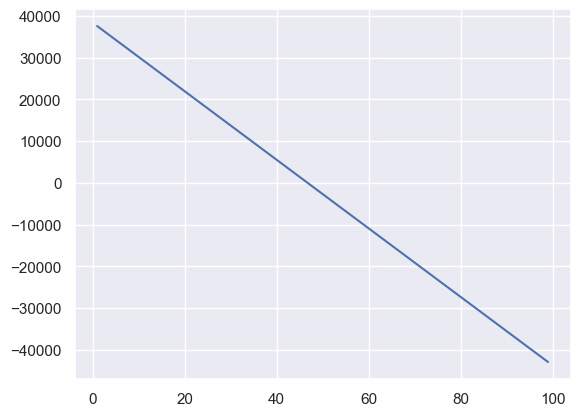

In [104]:
plt.plot(new_input, yhat)
yhat(0)
plt.show()

<h3> Принятие решений: определение хорошей модели Fit </h3>


<P> Теперь, когда мы визуализировали различные модели и сгенерировали значения R-Squared и MSE для подгонки, как мы определяем хорошую модель подгонки?
<ul>
    <li> <i> Что такое хорошее значение R-квадрат? </i> </li>
</ul>
</p>

<p> При сравнении моделей <b> модель с более высоким значением R-квадрата лучше подходит для данных.
<ul>
    <li> <i> Что такое хороший mse? </i> </li>
</ul>
</p>

<p> При сравнении моделей <b> модель с наименьшим значением MSE лучше подходит для данных. </p>


<h4> давайте посмотрим на значения для разных моделей. </h4>
<p> Простая линейная регрессия: использование шоссе-MPG в качестве переменной предиктора цены.
<ul>
    <li> r-squared: 0,49659118843391759 </li>
    <li> MSE: 3.16 x10^7 </li>
</ul>
</p>
    
<p> Многочисленная линейная регрессия: использование мощности, бордюр, размер двигателя и шоссе-MPG в качестве предиктора переменных цен.
<ul>
    <li> r-squared: 0,80896354913783497 </li>
    <li> MSE: 1,2 x10^7 </li>
</ul>
</p>
    
<p> Полиномиальная подгонка: использование шоссе-MPG в качестве переменной предиктора цены.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3> Простая модель линейной регрессии (SLR) против нескольких линейной модели регрессии (MLR) </H3>

<p> Обычно, чем больше у вас переменных, тем лучше ваша модель в прогнозировании, но это не всегда верно.Иногда у вас может быть недостаточно данных, вы можете столкнуться с числовыми проблемами, или многие из переменных могут быть бесполезными и даже действовать как шум.В результате вы всегда должны проверять MSE и r^2. </P>

<p> Чтобы сравнить результаты моделей MLR против SLR, мы рассматриваем комбинацию как R-квадрат, так и MSE, чтобы сделать наилучший вывод о соответствии модели.
<ul>
    <li> <b> mse </b>: MSE SLR составляет 3,16x10^7, в то время как MLR имеет MSE 1,2 x10^7.MSE MLR намного меньше. </Li>
    <li> <b> r-squared </b>: в этом случае мы также можем увидеть, что существует большая разница между R-квадратным размером SLR и R-квадратом MLR.R-квадрат для SLR (~ 0,497) очень мал по сравнению с R-квадратом для MLR (~ 0,809). </Li>
</ul>
</p>

Этот R-квадрат в сочетании с MSE показывает, что MLR кажется лучшей моделью в этом случае по сравнению с SLR.


<h3> Простая линейная модель (SLR) против полиномиальной подгонки </h3>


<ul>
    <li> <b> mse </b>: мы видим, что полиномиальная подгонка сбила MSE, поскольку эта MSE меньше, чем у SLR. </li>
    <li> <b> r-squared </b>: R-квадрат для полиномиального прилегаli>
</ul>
<p> Поскольку полиномиальная подгонка привела к более низкому MSE и более высокому R-квадрату, мы можем сделать вывод, что это была лучшая модель соответствия, чем простая линейная регрессия для прогнозирования «цены» с «шоссе-MPG» в качестве переменной предиктора.</p>


<h3> множественная линейная регрессия (MLR) по сравнению с полиномиальной подгонкой </h3>


<ul>
    <li> <b> mse </b>: MSE для MLR меньше MSE для полиномиальной подгонки. </li>
    <li> <b> r-squared </b>: R-квадрат для MLR также намного больше, чем для полиномиальной подгонки. </li>
</ul>

<h2> Заключение </h2>


<p> Сравнивая эти три модели, мы заключаем, что <b> модель MLR является лучшей моделью </b>, чтобы иметь возможность прогнозировать цену из нашего набора данных.Этот результат имеет смысл, так как у нас есть 27 переменных, и мы знаем, что более чем одна из этих переменных является потенциальным предиктором окончательной цены на автомобиль. </P>